In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

from sklearn import preprocessing
from pylab import text

In [2]:
dados_matlab = pd.read_csv("D:\\TEP - Matlab\\10-matlab-dados-3anos.csv", sep=';')
dados_matlab.drop(['Unnamed: 0', 'XMV(12)'], 1, inplace=True)
dados_matlab.head()

,XMEAS(1),XMEAS(2),XMEAS(3),XMEAS(4),XMEAS(5),XMEAS(6),XMEAS(7),XMEAS(8),XMEAS(9),XMEAS(10),...,XMV(2),XMV(3),XMV(4),XMV(5),XMV(6),XMV(7),XMV(8),XMV(9),XMV(10),XMV(11)
0,0.265340,3664.3,4434.6,9.2592,32.171,47.376,2799.1,64.964,122.90,0.19833,...,53.087,26.112,60.739,0,24.434,37.340,46.492,0,35.870,13.600
1,-0.000524,3652.2,4414.5,8.6496,32.383,46.327,2771.3,66.106,122.97,0.16407,...,53.102,33.171,71.152,0,20.360,37.365,46.543,0,37.253,16.757
2,0.337850,3691.0,4444.2,9.6664,31.728,47.540,2797.2,64.399,122.91,0.16746,...,53.105,33.225,62.889,0,20.482,37.306,46.522,0,36.310,11.477
3,0.325660,3653.2,4402.6,9.2448,32.229,47.417,2801.7,65.454,122.87,0.18373,...,53.089,31.998,60.956,0,23.074,37.304,46.459,0,36.127,11.417
4,0.309120,3657.1,4445.3,9.2965,31.955,47.425,2803.9,64.629,122.86,0.21036,...,53.090,30.479,60.541,0,26.244,37.297,46.437,0,36.056,13.647


In [3]:
# params_matlab.shape

In [4]:
params_matlab = pd.read_csv("D:\\TEP - Matlab\\10-params-3anos.csv", sep=';')
params_matlab.head(70)

,Unnamed: 0,random_status,random_duration
0,0,0,914
1,1,20,672
2,2,0,842
3,3,1,530
4,4,0,920
...,...,...,...
65,65,3,497
66,66,0,730
67,67,15,569
68,68,0,751


In [5]:
new_params_matlab = params_matlab.iloc[:150,:]

In [6]:
new_params_matlab['samples'] = new_params_matlab['random_duration'].cumsum().shift(1).fillna(0)
new_params_matlab.head()

<ipython-input-6-6244f4ede938>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_params_matlab['samples'] = new_params_matlab['random_duration'].cumsum().shift(1).fillna(0)


,Unnamed: 0,random_status,random_duration,samples
0,0,0,914,0.0
1,1,20,672,914.0
2,2,0,842,1586.0
3,3,1,530,2428.0
4,4,0,920,2958.0


In [7]:
new_params_matlab.tail()

,Unnamed: 0,random_status,random_duration,samples
145,145,8,504,99580.0
146,146,0,810,100084.0
147,147,12,760,100894.0
148,148,0,819,101654.0
149,149,19,755,102473.0


In [8]:
params_matlab['random_duration'].cumsum().shift(1).fillna(0)

0           0.0
1         914.0
2        1586.0
3        2428.0
4        2958.0
         ...   
763    523143.0
764    524058.0
765    524595.0
766    525182.0
767    525263.0
Name: random_duration, Length: 768, dtype: float64

In [9]:
dados_python = pd.read_csv("C:\\Users\\anaso\\Desktop\\workspace\\doutorado\data\\teste-python_dados-graficos.csv", sep=';')
dados_python.drop(['Unnamed: 0', 'STATUS'], 1, inplace=True)
dados_python.head()

,XMEAS(1),XMEAS(2),XMEAS(3),XMEAS(4),XMEAS(5),XMEAS(6),XMEAS(7),XMEAS(8),XMEAS(9),XMEAS(10),...,XMV(2),XMV(3),XMV(4),XMV(5),XMV(6),XMV(7),XMV(8),XMV(9),XMV(10),XMV(11)
0,0.249016,3669.257897,4501.008339,9.449552,27.320996,42.458404,2706.337423,74.639042,120.395689,0.336655,...,54.079251,24.791894,59.817988,22.565112,40.376400,34.307493,47.537449,47.579946,41.236066,19.582030
1,0.249237,3691.240035,4508.871049,9.427162,26.827658,42.794460,2704.601116,74.721139,120.399265,0.335980,...,53.985132,24.770164,60.017714,22.025944,40.136342,35.598661,46.813031,47.642137,41.274444,15.144564
2,0.250876,3668.163387,4527.323295,9.351588,27.010365,42.365508,2703.925678,74.373236,120.384636,0.337483,...,53.763475,24.616765,60.958098,22.407444,39.949611,40.251257,45.183418,47.464785,40.641116,18.231768
3,0.249720,3669.158307,4460.623257,9.471787,26.652186,42.666696,2704.341391,75.455363,120.401539,0.335028,...,54.561896,24.730399,60.730999,22.270945,40.343303,37.656724,40.288922,47.502494,41.786003,20.035613
4,0.241266,3652.137947,4515.510160,9.440549,26.890053,42.300660,2704.921507,74.301383,120.401877,0.338054,...,53.353175,24.191091,60.496433,22.434775,39.836905,40.873778,45.941358,47.469312,41.792575,15.925366


In [10]:
dados_python.tail()

,XMEAS(1),XMEAS(2),XMEAS(3),XMEAS(4),XMEAS(5),XMEAS(6),XMEAS(7),XMEAS(8),XMEAS(9),XMEAS(10),...,XMV(2),XMV(3),XMV(4),XMV(5),XMV(6),XMV(7),XMV(8),XMV(9),XMV(10),XMV(11)
11416,0.254014,3590.618473,4506.080271,9.278362,27.372828,42.056151,2712.274775,75.289170,120.389946,0.331255,...,54.480445,24.664851,62.407685,22.593436,40.096726,44.440879,45.608114,42.808213,40.127467,15.329004
11417,0.249662,3618.897536,4513.985023,9.369660,26.917662,41.873595,2712.193207,75.065045,120.400594,0.334178,...,54.385823,25.092815,60.272704,22.442810,39.618758,32.996180,45.031261,42.805470,40.524536,19.560611
11418,0.267617,3665.580650,4533.639552,9.370448,26.826287,42.247814,2711.244654,75.361962,120.394071,0.338808,...,54.795301,25.978397,61.922763,22.313453,40.336509,44.657429,45.529832,42.644297,41.120970,18.223286
11419,0.266147,3687.447916,4557.852797,9.336475,27.147443,42.081737,2711.581672,74.999786,120.417809,0.339522,...,54.505461,26.122916,60.713345,22.269865,40.207736,36.429160,45.780002,42.732668,41.126839,18.799648
11420,0.250955,3710.801082,4564.542507,9.268773,27.028325,42.369139,2713.374691,74.986751,120.396945,0.326220,...,53.853021,24.547306,58.976322,22.350760,38.946845,39.901255,51.283291,42.648913,41.099524,18.283160


In [11]:
scaled = preprocessing.scale(dados_python)
data_norm = pd.DataFrame(scaled, index=dados_python.index, columns=dados_python.columns)

In [12]:
data_norm.head()

,XMEAS(1),XMEAS(2),XMEAS(3),XMEAS(4),XMEAS(5),XMEAS(6),XMEAS(7),XMEAS(8),XMEAS(9),XMEAS(10),...,XMV(2),XMV(3),XMV(4),XMV(5),XMV(6),XMV(7),XMV(8),XMV(9),XMV(10),XMV(11)
0,-0.205722,0.166013,-0.110073,0.667332,1.986703,0.518764,0.023368,-0.427702,-0.056353,0.030348,...,0.173048,-0.181468,-0.548964,0.313796,0.244292,-1.265309,0.413706,-0.210983,0.063506,0.725426
1,-0.203913,0.775538,0.022372,0.552125,-0.357733,1.950183,-0.069382,-0.328069,-0.008662,-0.009969,...,0.041125,-0.183277,-0.495178,-0.060515,0.112721,-0.835311,0.106218,-0.203964,0.080958,-1.953125
2,-0.190501,0.135664,0.333194,0.163269,0.510528,0.123079,-0.105463,-0.750282,-0.203775,0.079783,...,-0.269561,-0.196042,-0.241931,0.204337,0.010377,0.714145,-0.585493,-0.223980,-0.207032,-0.089621
3,-0.199959,0.163251,-0.790347,0.781743,-1.191607,1.405975,-0.083256,0.562980,0.021679,-0.066849,...,0.849549,-0.186586,-0.303089,0.109574,0.226152,-0.149914,-2.663026,-0.219725,0.313576,0.999219
4,-0.269147,-0.308693,0.134205,0.621008,-0.061221,-0.153136,-0.052267,-0.837483,0.026180,0.113938,...,-0.844661,-0.231466,-0.366258,0.223311,-0.051395,0.921463,-0.263775,-0.223469,0.316565,-1.481815


In [13]:
data_norm.tail()

,XMEAS(1),XMEAS(2),XMEAS(3),XMEAS(4),XMEAS(5),XMEAS(6),XMEAS(7),XMEAS(8),XMEAS(9),XMEAS(10),...,XMV(2),XMV(3),XMV(4),XMV(5),XMV(6),XMV(7),XMV(8),XMV(9),XMV(10),XMV(11)
11416,-0.164816,-2.014517,-0.024638,-0.213508,2.233019,-1.194613,0.340530,0.361290,-0.132953,-0.292323,...,0.735384,-0.192041,0.148446,0.333460,0.091008,2.109416,-0.405225,-0.749528,-0.440601,-1.841792
11417,-0.200436,-1.230390,0.108515,0.256256,0.069985,-1.972204,0.336172,0.089292,0.009075,-0.117638,...,0.602756,-0.156426,-0.426509,0.228889,-0.170958,-1.702016,-0.650078,-0.749838,-0.260044,0.712498
11418,-0.053489,0.064049,0.439589,0.260311,-0.364246,-0.378234,0.285503,0.449629,-0.077936,0.158948,...,1.176703,-0.082730,0.017856,0.139085,0.222429,2.181534,-0.438453,-0.768028,0.011169,-0.094741
11419,-0.065517,0.670389,0.847454,0.085507,1.161948,-1.085630,0.303505,0.010095,0.238678,0.201595,...,0.770447,-0.070704,-0.307843,0.108824,0.151850,-0.558730,-0.332265,-0.758055,0.013838,0.253163
11420,-0.189851,1.317930,0.960140,-0.262849,0.595876,0.138546,0.399285,-0.005724,-0.039604,-0.593138,...,-0.144048,-0.201822,-0.775627,0.164985,-0.539221,0.597584,2.003678,-0.767507,0.001417,-0.058600


## Imagens grayscale

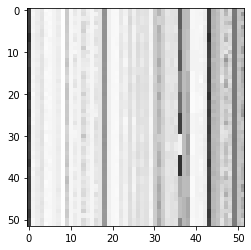

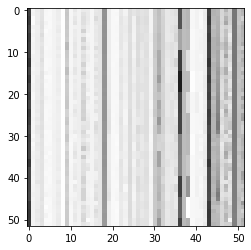

In [14]:
formatted = (dados_python * 255 / np.max(dados_python)).astype('uint8')

matriz_normal = formatted.iloc[0:52,:]
plt.imshow(matriz_normal.values, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
plt.show()

matriz_falta = formatted.iloc[1300:1352,:]
plt.imshow(matriz_falta.values, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
plt.show()

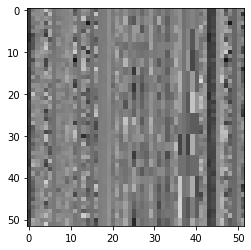

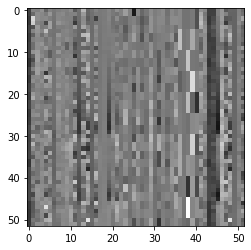

In [15]:
scaled = 255*(dados_python - dados_python.min())/(dados_python.max() - dados_python.min())
scaled = scaled.astype('uint8')

matriz_normal = scaled.iloc[0:52,:]
plt.imshow(matriz_normal.values, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
plt.show()

matriz_falta = scaled.iloc[1300:1352,:]
plt.imshow(matriz_falta.values, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
plt.show()

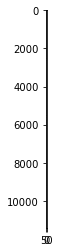

In [16]:
min_ = np.min(dados_python)
max_ = np.max(dados_python)
GI = (255 * (dados_python-min_) / (max_-min_)).astype(np.uint8)
plt.imshow(GI.values, cmap='gray')

In [17]:
# from PIL import Image
# im = Image.fromarray(formatted)
# im.show()

## Variáveis de processo

In [18]:
def print_graphs(variable, variable_number):
    
    for i in range(1,variable_number):

#         y_max = tep.process_data[variable + '(' + str(i) + ')'].max()
#         y_min = tep.process_data[variable + '(' + str(i) + ')'].min()
#         diff = y_max - y_min

        fig = plt.figure(figsize=(8,4))#, dpi=600)
        # ax = plt.axes()

        plt.plot(range(0,len(dados_matlab[variable + '(' + str(i) + ')'].iloc[5:2428])), 
                             dados_matlab[variable + '(' + str(i) + ')'].iloc[5:2428], label='MATLAB', linewidth=1)
        
        plt.plot(range(0,len(dados_python[variable + '(' + str(i) + ')'].iloc[5:2428])), 
                             dados_python[variable + '(' + str(i) + ')'].iloc[5:2428], label='PYTHON', linewidth=1)
        
        
        plt.axvline(x=914, linestyle='--', color='black')
        plt.axvline(x=1586, linestyle='--', color='black')
#         plt.axvline(x=2428, linestyle='--', color='black')
#         plt.axvline(x=2958, linestyle='--', color='black')
#         plt.ylim(y_min-diff, y_max+diff)
        
        plt.legend(loc='best')
        plt.title(variable + '(' + str(i) + ')')
        plt.xlabel("Sample")

<ipython-input-18-17df4974088d>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4))#, dpi=600)


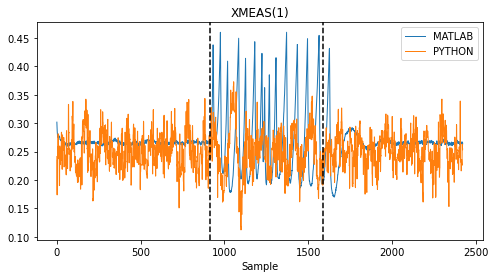

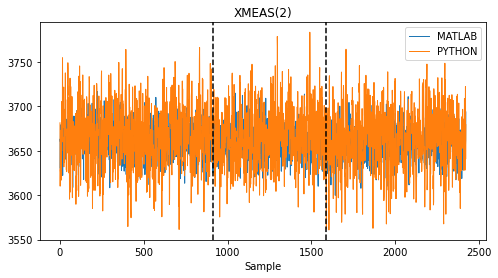

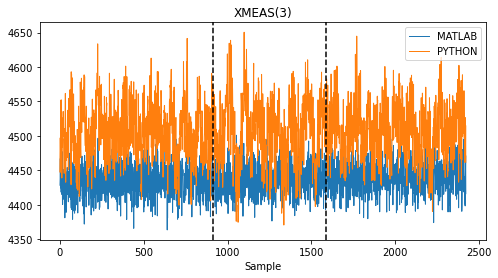

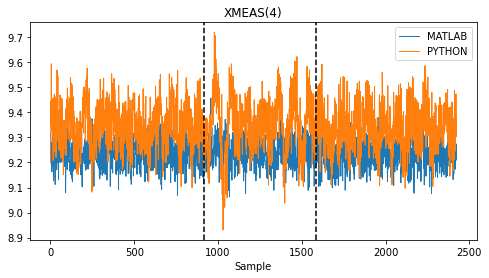

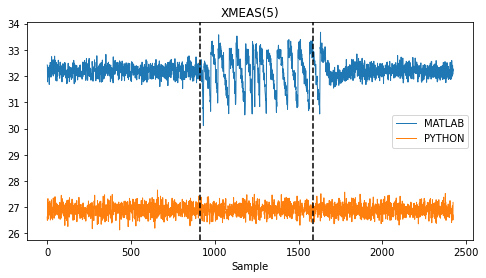

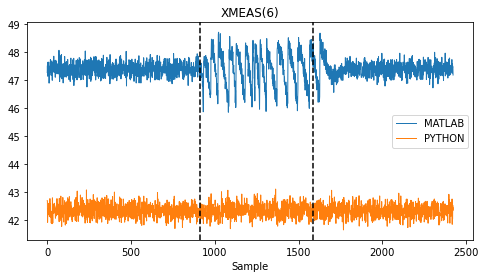

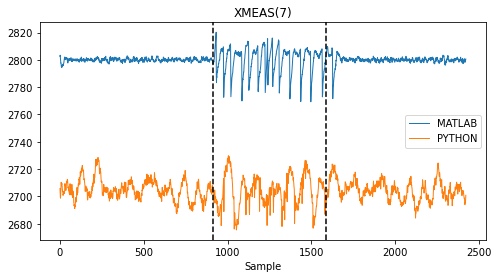

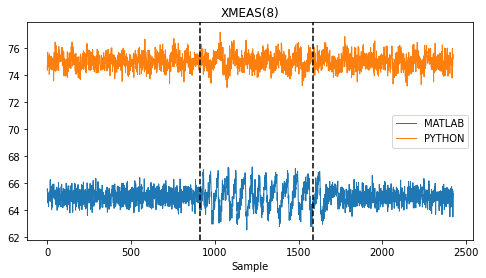

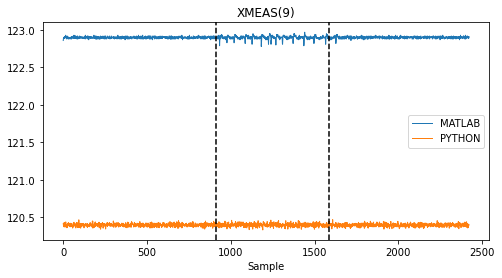

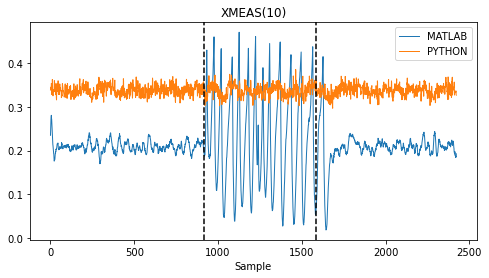

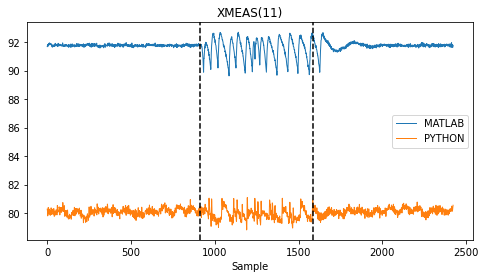

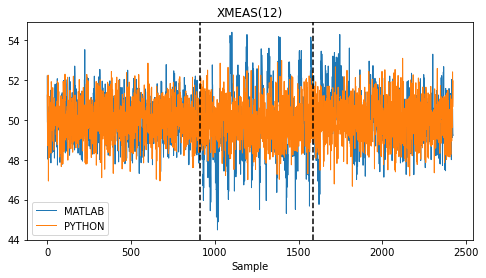

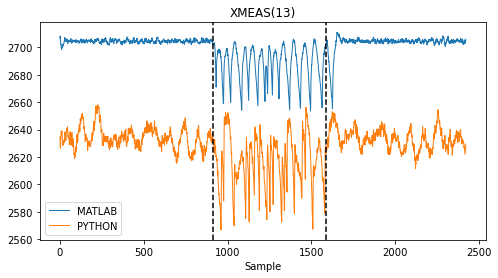

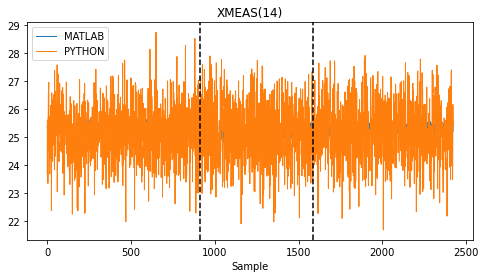

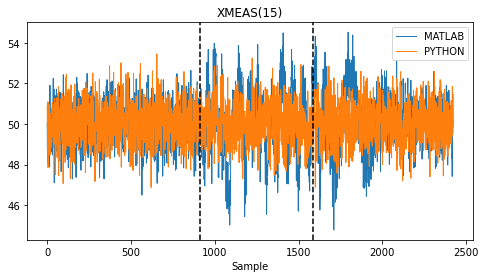

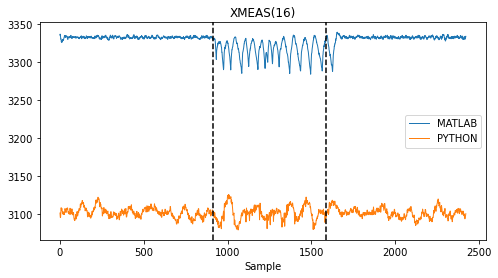

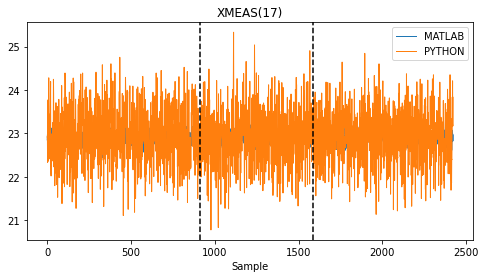

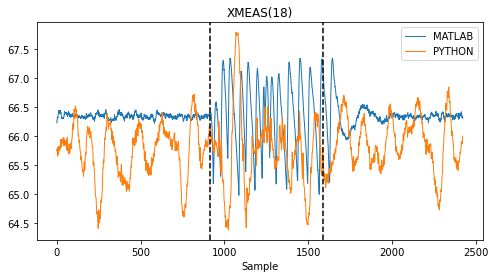

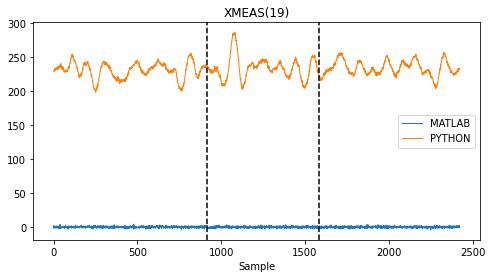

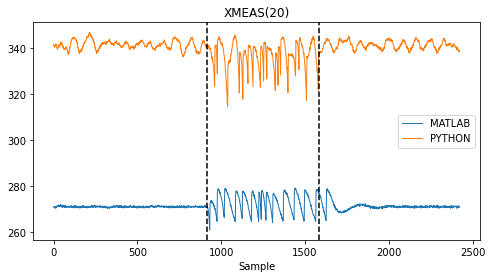

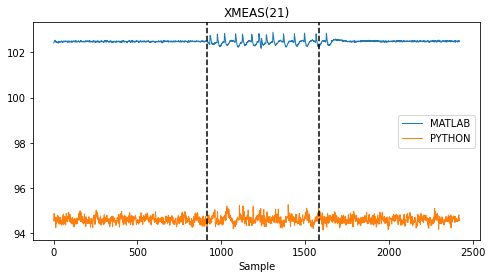

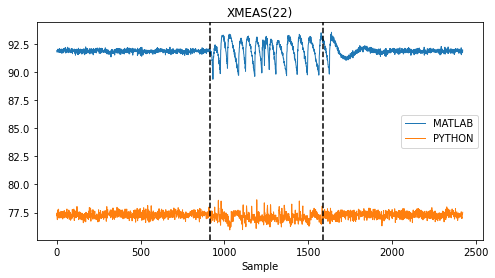

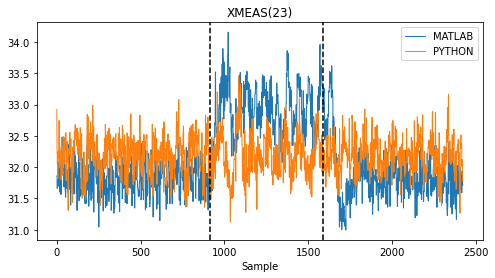

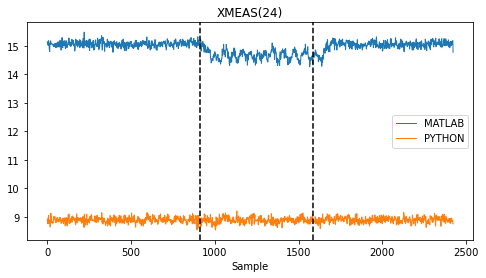

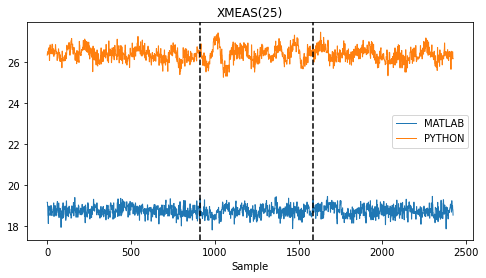

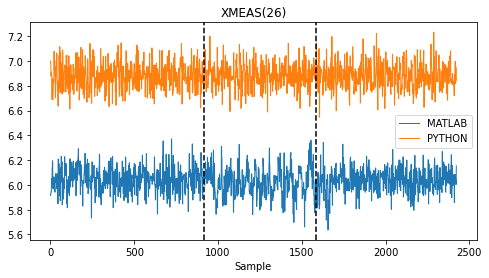

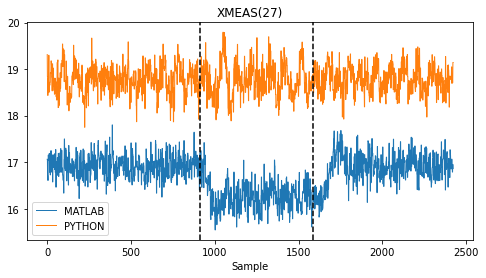

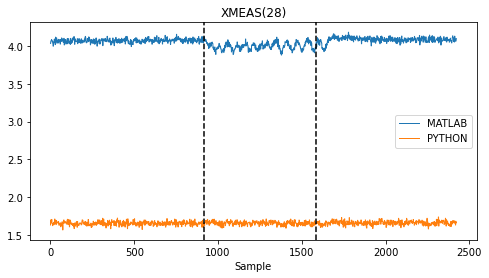

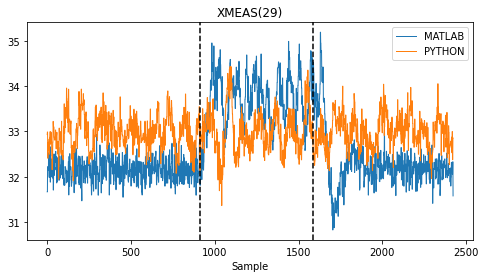

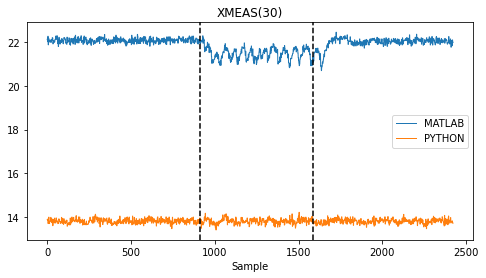

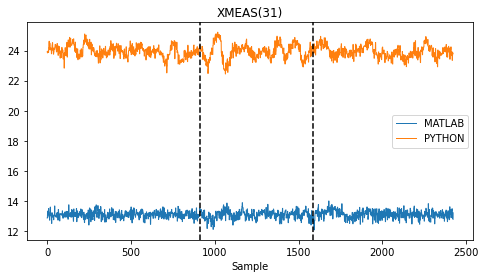

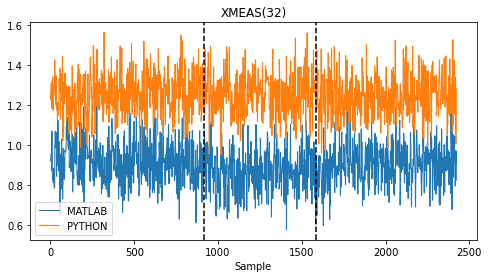

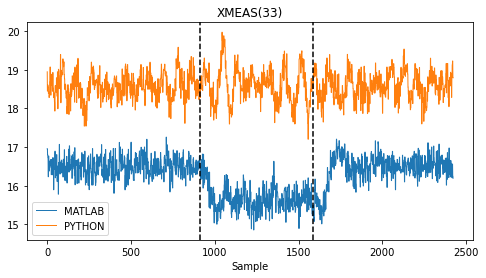

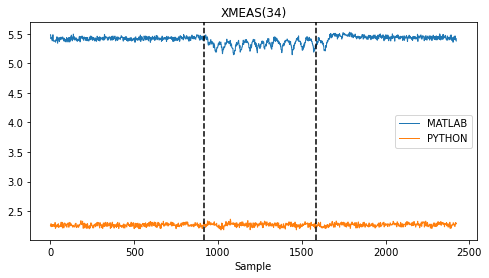

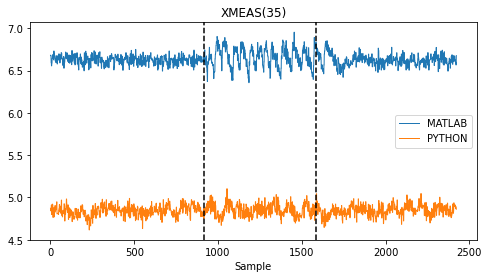

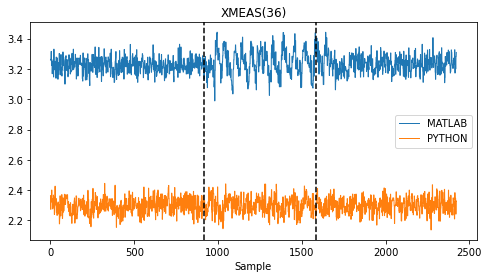

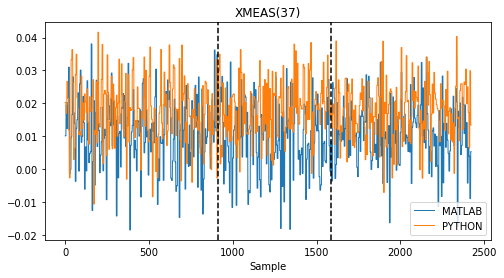

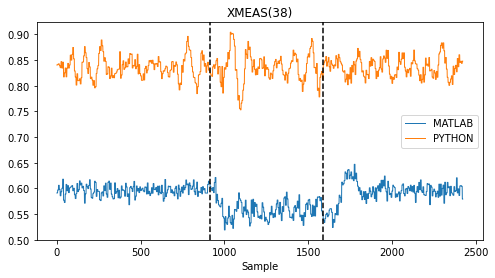

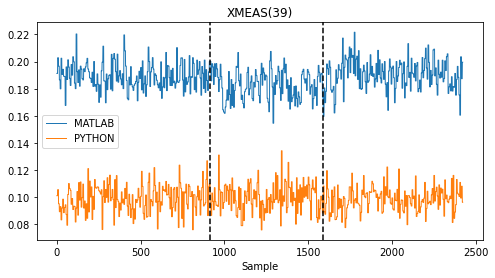

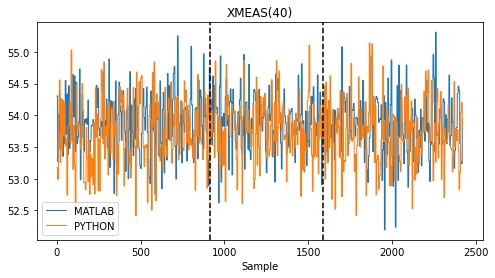

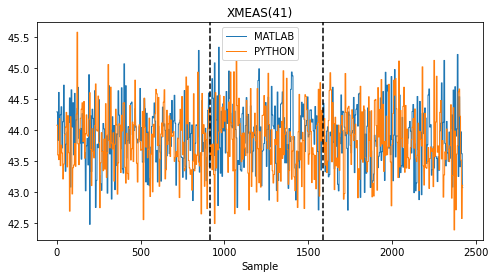

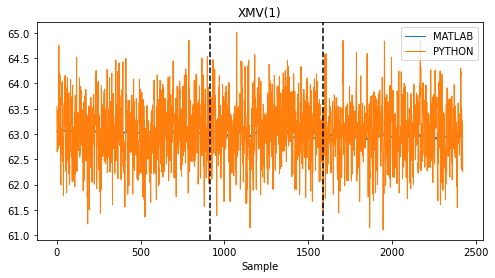

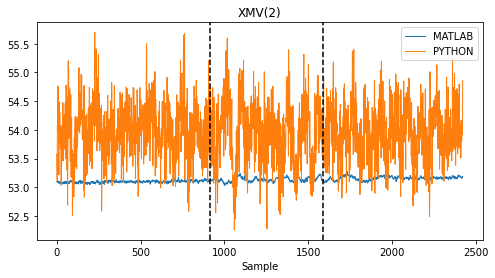

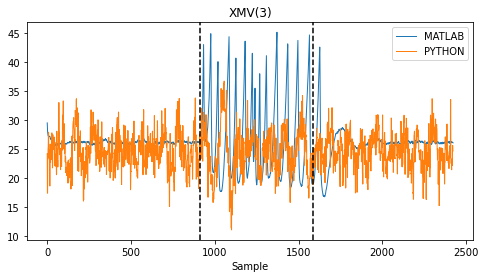

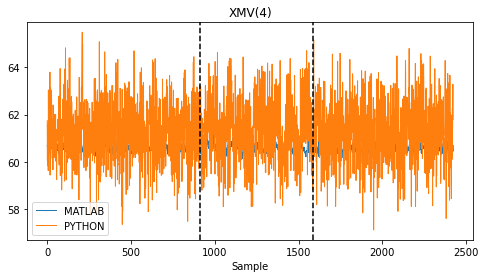

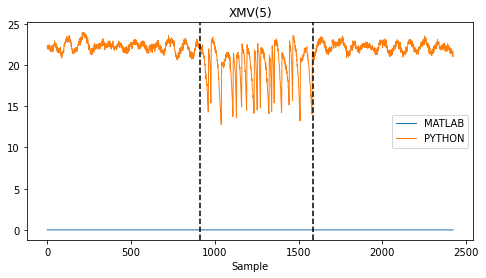

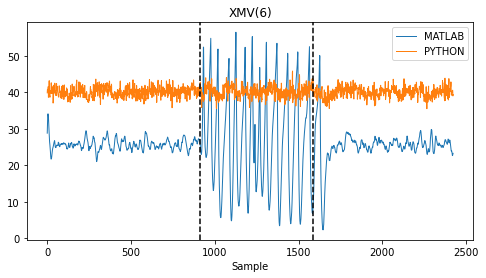

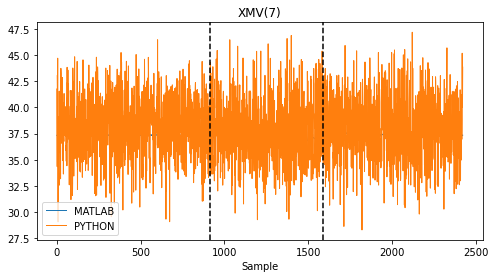

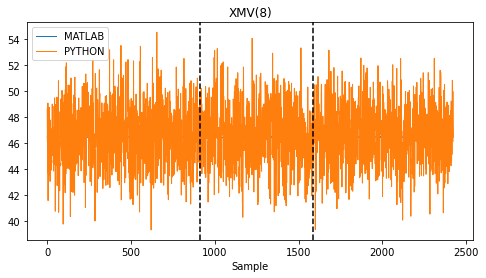

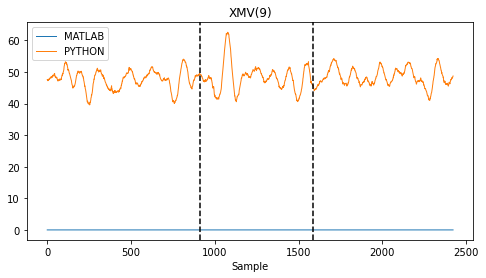

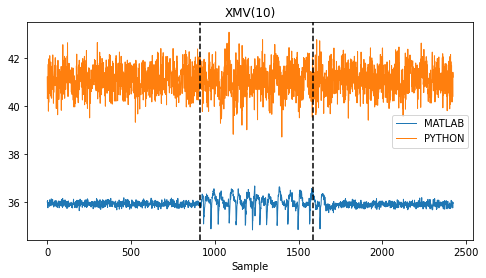

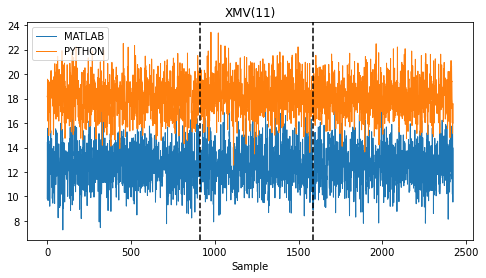

In [19]:
print_graphs('XMEAS', 42)
print_graphs('XMV', 12)

Text(0, 0.5, 'Flow rate (kscmh)')

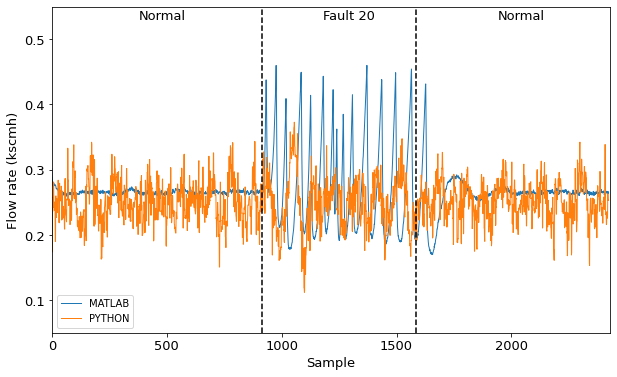

In [20]:
fig = plt.figure(figsize=(10,6))

plt.plot(range(0,len(dados_matlab['XMEAS(1)'].iloc[5:2428])), 
                     dados_matlab['XMEAS(1)'].iloc[5:2428], label='MATLAB', linewidth=1)

plt.plot(range(0,len(dados_python['XMEAS(1)'].iloc[5:2428])), 
                     dados_python['XMEAS(1)'].iloc[5:2428], label='PYTHON', linewidth=1)

y_max = 0.55
y_min =0.05
plt.ylim(y_min, y_max)
plt.xlim(0, 2428)

plt.axvline(x=914, linestyle='--', color='black')
plt.axvline(x=1586, linestyle='--', color='black')

text(380, 0.53, "Normal", fontsize=13)
text(1180, 0.53, "Fault 20", fontsize=13)
text(1940, 0.53, "Normal", fontsize=13)

plt.tick_params(axis='both', which='major', labelsize=13)

plt.legend(loc='lower left')
plt.xlabel("Sample", fontsize=13)
plt.ylabel("Flow rate (kscmh)", fontsize=13)

# fig.savefig('xmeas1.svg', format='svg', dpi=600)
# plt.savefig('xmeas1.eps', format='eps')
# fig.savefig('xmeas1.png', format='png', dpi=600)

Text(0, 0.5, 'Pressure (kPa)')

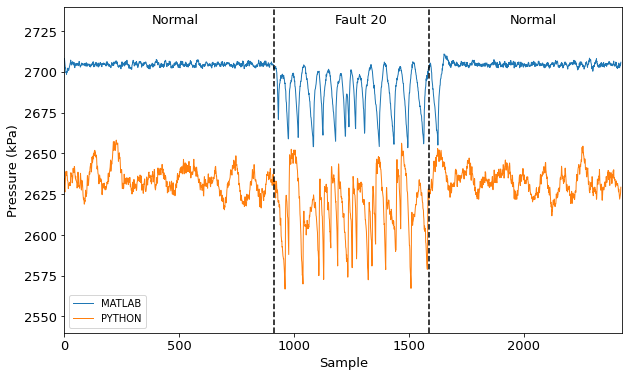

In [21]:
fig = plt.figure(figsize=(10,6))

plt.plot(range(0,len(dados_matlab['XMEAS(13)'].iloc[5:2428])), 
                     dados_matlab['XMEAS(13)'].iloc[5:2428], label='MATLAB', linewidth=1)

plt.plot(range(0,len(dados_python['XMEAS(13)'].iloc[5:2428])), 
                     dados_python['XMEAS(13)'].iloc[5:2428], label='PYTHON', linewidth=1)

y_max = 2740
y_min = 2540
plt.ylim(y_min, y_max)
plt.xlim(0, 2428)

plt.axvline(x=914, linestyle='--', color='black')
plt.axvline(x=1586, linestyle='--', color='black')

text(380, 2730, "Normal", fontsize=13)
text(1180, 2730, "Fault 20", fontsize=13)
text(1940, 2730, "Normal", fontsize=13)

plt.tick_params(axis='both', which='major', labelsize=13)

plt.legend(loc='lower left')
plt.xlabel("Sample", fontsize=13)
plt.ylabel("Pressure (kPa)", fontsize=13)

# fig.savefig('xmeas13.svg', format='svg', dpi=600)
# plt.savefig('xmeas13.eps', format='eps')
# fig.savefig('xmeas13.png', format='png', dpi=600)

Text(0, 0.5, 'Product separator underflow (m3/h)')

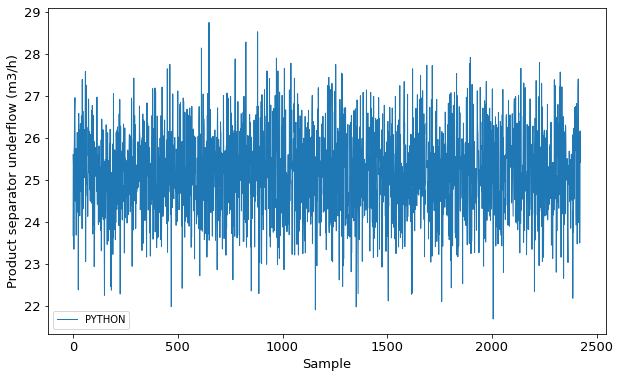

In [22]:
fig = plt.figure(figsize=(10,6))

plt.plot(range(0,len(dados_python['XMEAS(14)'].iloc[5:2428])), 
                     dados_python['XMEAS(14)'].iloc[5:2428], label='PYTHON', linewidth=1)

plt.tick_params(axis='both', which='major', labelsize=13)

plt.legend(loc='lower left')
plt.xlabel("Sample", fontsize=13)
plt.ylabel("Product separator underflow (m3/h)", fontsize=13)

# fig.savefig('xmeas14-python.svg', format='svg', dpi=600)
# plt.savefig('xmeas14-python.eps', format='eps')
# fig.savefig('xmeas14-python.png', format='png', dpi=600)

## ROC curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

from itertools import cycle
from keras.optimizers import RMSprop
from keras.models import Sequential, load_model, model_from_json
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score

%run ./base_functions.ipynb

In [ ]:
main_path = "C:\\Users\\anaso\\Desktop\\workspace\\doutorado\\"
data_folder = "D:\\TEP - Python\\"
cnn_models_folder = "D:\\Modelos treinados\\CNN\\"

graph_folder = main_path + "graphs\\"
models_folder = main_path + "models\\"
outputs_folder = main_path + "outputs\\"

In [ ]:
data1 = pd.read_csv(data_folder + "13-python_dados-1ano.csv", sep=';')

sim_status1 = pd.read_csv(data_folder + "13-params-1ano.csv", sep=';')
sim_status1 = sim_status1.drop(['Unnamed: 0'], 1)

In [ ]:
nlinhas = 52
ncolunas = 52

data1 = data1.drop(['Unnamed: 0', 'STATUS'], 1)
x_windows_1, y_windows_1, y_windows_ohe_1 = data_prepro(data1, sim_status1, nlinhas, ncolunas, 5, standardization=True)

In [ ]:
TEST_CODE = 'T45'

json_file = open(cnn_models_folder + 'simple_model_'+ TEST_CODE + '-CNN.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights(cnn_models_folder + "simple_model_"+ TEST_CODE + "-CNN.h5")

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc', keras.metrics.Precision(), keras.metrics.Recall()])

In [ ]:
out_test = model.predict(x_windows_1)

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 21

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_windows_ohe_1[:, i], out_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_windows_ohe_1.ravel(), out_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
out_test.shape

In [ ]:
def df_prepro(data):
    
    y_data = data['STATUS'].copy()
    x_data = data.drop(['Unnamed: 0', 'STATUS'], 1)
    
    # Data standardization
    scaled = preprocessing.scale(x_data)
    x_data_norm = pd.DataFrame(scaled, index=x_data.index, columns=x_data.columns)
    
    y_df = pd.DataFrame(y_data).astype('category')
    y_df_ohe = pd.get_dummies(y_df)
    y_ohe = y_df_ohe.values
    
    return x_data_norm, y_data, y_ohe

x_test, y_test, y_test_ohe = df_prepro(data1)

TEST_CODE = '19'
mlp_models_folder = "D:\\Modelos treinados\\MLP Keras\\"

json_file = open(mlp_models_folder + 'simple_model_mlp_'+ TEST_CODE + '-keras.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights(mlp_models_folder + "simple_model_mlp_"+ TEST_CODE + "-keras.h5")

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['acc', keras.metrics.Precision(), keras.metrics.Recall()])

out_test = model.predict(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 21

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_ohe[:, i], out_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_ohe.ravel(), out_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,6))

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## Transfer learning

In [ ]:
history_file = open('D:\\Modelos treinados\\simple_model_tf5-T37-CNN-history', 'r')
loaded_history_file = history_file.read()

# history_file = open(cnn_models_folder + 'simple_model_tf4-T37-CNN-history', encoding="utf8")

In [ ]:
history_file

In [ ]:
with open(cnn_models_folder + 'simple_model_tf4-T37-CNN-history', 'r', encoding="utf8") as f2:
    data = f2.read()
    print(data)

In [ ]:
import json
history_dict = json.load(open('D:\\Modelos treinados\\simple_model_tf5-T37-CNN-history', 'r'))

In [ ]:
from pickle import load
import tensorflow

# config={'name': 'precision_2', 'dtype': 'float32', 'thresholds': None, 'top_k': None, 'class_id': None}
# custom_objects={'class_name': 'Precision'}

# tensorflow.keras.metrics.deserialize(config, custom_objects=custom_objects)

with open('D:\\Modelos treinados\\simple_model_tf5-T37-CNN-history', 'rb') as handle: # loading old history 
#     history_dict = load(handle)
    data = handle.read()

In [ ]:
custom_objects={'class_name': 'Precision', 'config': {'name': 'precision_2', 'dtype': 'float32', 'thresholds': None, 'top_k': None, 'class_id': None}}

In [ ]:
import h5py
filename = "D:\\Modelos treinados\\simple_model_tf5-T37-CNN-history"

h5f = h5py.File(filename, 'r')

# get a List of data sets in group 'dd48'
a_dset_keys = list(h5f['data'].keys())

# Get the data
for dset in a_dset_keys :
    ds_data = (h5f['data'][dset])
    print ('dataset=', dset)
    print (ds_data.dtype)
    if ds_data.dtype == 'float64' :
        csvfmt = '%.18e'
    elif ds_data.dtype == 'int64' :
        csvfmt = '%.10d'
    else:
        csvfmt = '%s'
    np.savetxt('output_'+dset+'.csv', ds_data, fmt=csvfmt, delimiter=',')